In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\sebas\\Documents\\DS_Project\\NBA_Business_Analytics'

In [3]:
nba=pd.read_csv("data/training_set.csv")
players=pd.read_csv("data/player_data.csv")
players=players.where(players['Active_Status']=='Active').dropna()

ASVotes_2017=pd.read_csv("data/2017_ASG.csv")
ASVotes_2018=pd.read_csv("data/2018_ASG.csv")

In [4]:
nba.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded_Viewers
0,2016-17,21600001,10/25/2016,NYK,CLE,C113,18
1,2016-17,21600001,10/25/2016,NYK,CLE,C193,1
2,2016-17,21600001,10/25/2016,NYK,CLE,C126,4
3,2016-17,21600001,10/25/2016,NYK,CLE,C163,11
4,2016-17,21600001,10/25/2016,NYK,CLE,C73,3


In [5]:
players.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Steals,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls
0,2016-17,21600001.0,10/25/2016,CLE,101112.0,Channing Frye,None,Active,14.0,6.0,...,1.0,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0
1,2016-17,21600001.0,10/25/2016,CLE,201567.0,Kevin Love,East ASG,Active,25.0,23.0,...,3.0,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0
2,2016-17,21600001.0,10/25/2016,CLE,202681.0,Kyrie Irving,East ASG,Active,30.0,29.0,...,2.0,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0
3,2016-17,21600001.0,10/25/2016,CLE,202684.0,Tristan Thompson,None,Active,22.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-17,21600001.0,10/25/2016,CLE,202697.0,Iman Shumpert,None,Active,14.0,2.0,...,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0


In [6]:
nba=nba.groupby(['Season','Game_ID','Game_Date', 'Away_Team','Home_Team'], as_index=False).agg(np.sum)
nba=nba.rename(columns={'Rounded_Viewers':'Total_Viewers'})

In [7]:
nba.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,2016-17,21600001,10/25/2016,NYK,CLE,57691
1,2016-17,21600002,10/25/2016,UTA,POR,40740
2,2016-17,21600003,10/25/2016,SAS,GSW,60428
3,2016-17,21600004,10/26/2016,MIA,ORL,22756
4,2016-17,21600005,10/26/2016,DAL,IND,33922


Since what we care about is total international viewership for each game, we aggregated the number of viewers by game.

In [8]:
nba['Game_ID']=nba['Game_ID'].apply(str)

nba['Month']=nba['Game_Date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").strftime("%B"))
nba['Weekday']=nba['Game_Date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").strftime("%A"))
nba['Day_Num']=nba['Game_Date'].apply(lambda x: datetime.strptime(x,"%m/%d/%Y").weekday())

month_num={'October':1,'November':2,'December':3,'January':4,'February':5,'March':6,'April':7}
nba['Month_Num']=nba['Month'].map(month_num)

In [9]:
nba.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,Month,Weekday,Day_Num,Month_Num
0,2016-17,21600001,10/25/2016,NYK,CLE,57691,October,Tuesday,1,1
1,2016-17,21600002,10/25/2016,UTA,POR,40740,October,Tuesday,1,1
2,2016-17,21600003,10/25/2016,SAS,GSW,60428,October,Tuesday,1,1
3,2016-17,21600004,10/26/2016,MIA,ORL,22756,October,Wednesday,2,1
4,2016-17,21600005,10/26/2016,DAL,IND,33922,October,Wednesday,2,1


We extracted the month and weekday from the date so that we could analyze the effects that they have on viewership. October is 1 because that is the month that the NBA season starts.

In [10]:
monthly_viewers=nba.groupby('Month',as_index=False).agg(np.mean).sort_values('Month_Num').drop(['Month_Num','Day_Num'],axis=1).rename(columns={'Total_Viewers':'Avg_Monthly_Viewers'})
daily_viewers=nba.groupby('Weekday',as_index=False).agg(np.mean).sort_values('Day_Num').drop(['Month_Num','Day_Num'],axis=1).rename(columns={'Total_Viewers':'Avg_Daily_Viewers'})

In [11]:
monthly_viewers

,Month,Avg_Monthly_Viewers
6,October,26877.960630
5,November,19631.377410
1,December,16159.407008
3,January,17001.851312
2,February,15392.463602
4,March,14287.091864
0,April,13689.207792


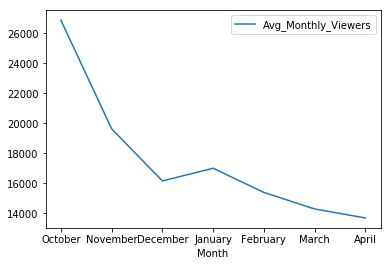

In [12]:
monthly_viewers.plot(x='Month',y='Avg_Monthly_Viewers')

According to our data, viewership is at its highest when the season begins, and progressively deminishes.

In [13]:
daily_viewers

,Weekday,Avg_Daily_Viewers
1,Monday,16268.482759
5,Tuesday,17485.631373
6,Wednesday,14639.956633
4,Thursday,20862.146067
0,Friday,16564.732955
2,Saturday,17376.184564
3,Sunday,18287.272340


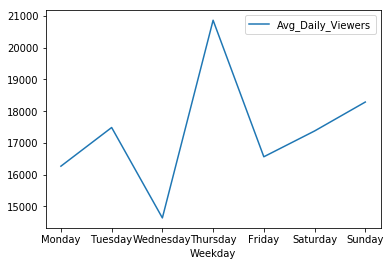

In [14]:
daily_viewers.plot(x='Weekday',y='Avg_Daily_Viewers')

Average viewership seems to be abnormally high on Thurdays. This is possibly due to the way that networks schedule games. Certain days may be reserved for the biggest and most widely available games.

In [15]:
players=players[['Season','Game_ID','Game_Date','Team','Person_ID','Name','ASG_Team','Active_Status']]

In [16]:
nba_2017=nba.where(nba['Season']=="2016-17").dropna()
nba_2018=nba.where(nba['Season']=="2017-18").dropna()

players_2017=players.where(players['Game_ID']<21700000).dropna()
players_2018=players.where(players['Game_ID']>21700000).dropna()

players_2017['Game_ID']=players_2017['Game_ID'].apply(lambda x:str(int(x)))
players_2018['Game_ID']=players_2018['Game_ID'].apply(lambda x:str(int(x)))

In [17]:
players_2017.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status
0,2016-17,21600001,10/25/2016,CLE,101112.0,Channing Frye,None,Active
1,2016-17,21600001,10/25/2016,CLE,201567.0,Kevin Love,East ASG,Active
2,2016-17,21600001,10/25/2016,CLE,202681.0,Kyrie Irving,East ASG,Active
3,2016-17,21600001,10/25/2016,CLE,202684.0,Tristan Thompson,None,Active
4,2016-17,21600001,10/25/2016,CLE,202697.0,Iman Shumpert,None,Active


Because the composition and situation of a team may change drastically from season to season, splitting the data up by season will give us the most consistent results.

In [18]:
def ASG(team):
    if team!="None":
        return 1
    else:
        return 0
def to_int(num):
    if isinstance(num,str):
        return int(num.replace(',',''))
    else:
        return int(num)

players_2017['AS']=players_2017['ASG_Team'].apply(ASG)
players_2018['AS']=players_2018['ASG_Team'].apply(ASG)

players_2017=players_2017.merge(ASVotes_2017,on='Name', how='left')
players_2017['Votes']=players_2017['Votes'].fillna(value=0).apply(to_int)

players_2018=players_2018.merge(ASVotes_2018, on='Name', how='left')
players_2018['Votes']=players_2018['Votes'].fillna(value=0).apply(to_int)

In [19]:
players_2017.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,AS,Votes
0,2016-17,21600001,10/25/2016,CLE,101112.0,Channing Frye,None,Active,0,46384
1,2016-17,21600001,10/25/2016,CLE,201567.0,Kevin Love,East ASG,Active,1,909488
2,2016-17,21600001,10/25/2016,CLE,202681.0,Kyrie Irving,East ASG,Active,1,1696769
3,2016-17,21600001,10/25/2016,CLE,202684.0,Tristan Thompson,None,Active,0,245822
4,2016-17,21600001,10/25/2016,CLE,202697.0,Iman Shumpert,None,Active,0,50970


Since player popularity is likely an important factor for viewership, we merged data about the number of all star votes a player got onto our player data sets. The fans vote every year for which players they would like to see start in the All Star game in February. We're using the number of All Star votes as a proxy for popularity. `AS` is just an indicator for whether or not the player made the All Star team. this is a proxy of the player's popularity as well as his skill.

In [20]:
p17=players_2017.groupby('Game_ID',as_index=False).agg(np.sum).drop('Person_ID', axis=1)
p18=players_2018.groupby('Game_ID', as_index=False).agg(np.sum).drop('Person_ID', axis=1)

In [21]:
p17.head()

,Game_ID,AS,Votes
0,21600001,4,6442929
1,21600002,0,667266
2,21600003,5,9984969
3,21600004,0,315854
4,21600005,1,712937


In [22]:
nba_2017=nba_2017.merge(p17, on='Game_ID')
nba_2018=nba_2018.merge(p18, on='Game_ID')

In [23]:
nba_2017.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers,Month,Weekday,Day_Num,Month_Num,AS,Votes
0,2016-17,21600001,10/25/2016,NYK,CLE,57691.0,October,Tuesday,1.0,1.0,4,6442929
1,2016-17,21600002,10/25/2016,UTA,POR,40740.0,October,Tuesday,1.0,1.0,0,667266
2,2016-17,21600003,10/25/2016,SAS,GSW,60428.0,October,Tuesday,1.0,1.0,5,9984969
3,2016-17,21600004,10/26/2016,MIA,ORL,22756.0,October,Wednesday,2.0,1.0,0,315854
4,2016-17,21600005,10/26/2016,DAL,IND,33922.0,October,Wednesday,2.0,1.0,1,712937


We merged the player data indicating the number of all stars in a game to our main data sets.

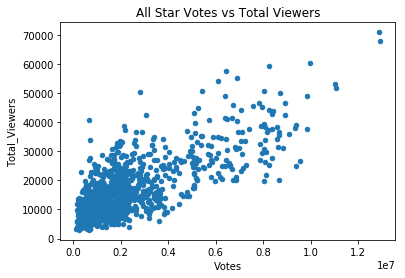

In [24]:
nba_2017.plot.scatter(x='Votes',y='Total_Viewers', title="All Star Votes vs Total Viewers")

We can see that there is a clear positive relationship between the number of all star votes a team received and the number of total viewers.

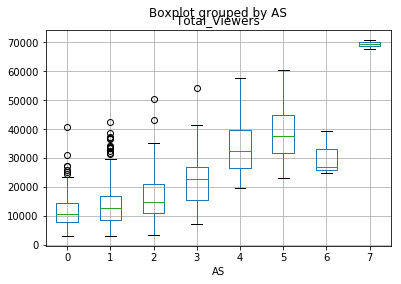

In [25]:
nba_2017.boxplot(column='Total_Viewers', by='AS')

As expected, the more All Stars present for a game, the more viewers we can expect for that game.There is an unexpected drop in viewership when there are 6 All Stars. This is likely due to some other factors like the weekday or month when those games happened. Since there were probably few games that featured 6 All Stars, the average viewership has a fairly high variance.

In [26]:
nba_2017.corr()['Total_Viewers']

Total_Viewers    1.000000
Day_Num          0.100132
Month_Num       -0.277465
AS               0.624570
Votes            0.749681
Name: Total_Viewers, dtype: float64

Out of the features that we have examined thus far, the number of All Star votes seems to be the most strongly correlated. However, because the other features are categorical in nature rather than continuous and quantitative, we probably should not put too much stock into their correlations.

In [27]:
by_team17=pd.DataFrame(columns=['Team','Avg_Viewers', 'Votes'])
for team in nba_2017['Away_Team'].unique():
    a=nba_2017['Away_Team']==team
    b=nba_2017['Home_Team']==team
    avg_viewers=pd.concat([nba_2017[a],nba_2017[b]])['Total_Viewers'].mean()
    avg_votes=pd.concat([nba_2017[a],nba_2017[b]])['Votes'].mean()
    
    row=pd.DataFrame([[team,avg_viewers, avg_votes], ], columns=['Team','Avg_Viewers', 'Votes'])
    by_team17=by_team17.append(row)


by_team18=pd.DataFrame(columns=['Team','Avg_Viewers', 'Votes'])
for team in nba_2018['Away_Team'].unique():
    a=nba_2018['Away_Team']==team
    b=nba_2018['Home_Team']==team
    avg_viewers=pd.concat([nba_2018[a],nba_2018[b]])['Total_Viewers'].mean()
    avg_votes=pd.concat([nba_2018[a],nba_2018[b]])['Votes'].mean()
    
    row=pd.DataFrame([[team,avg_viewers, avg_votes], ], columns=['Team','Avg_Viewers', 'Votes'])
    by_team18=by_team18.append(row)

  

In [28]:
by_team17=by_team17.sort_values('Avg_Viewers',ascending=False)
by_team17

,Team,Avg_Viewers,Votes
0,GSW,35505.300000,8.084181e+06
0,CLE,31757.691176,5.811344e+06
0,OKC,24420.531250,3.098927e+06
0,SAS,21187.900000,3.100491e+06
0,NYK,20320.236111,2.298318e+06
0,HOU,19030.176471,4.229003e+06
0,LAL,18873.114286,2.208032e+06
0,BOS,18736.076923,2.054360e+06
0,CHI,18704.805970,2.689271e+06
0,LAC,16973.295775,2.410083e+06


<BarContainer object of 30 artists>

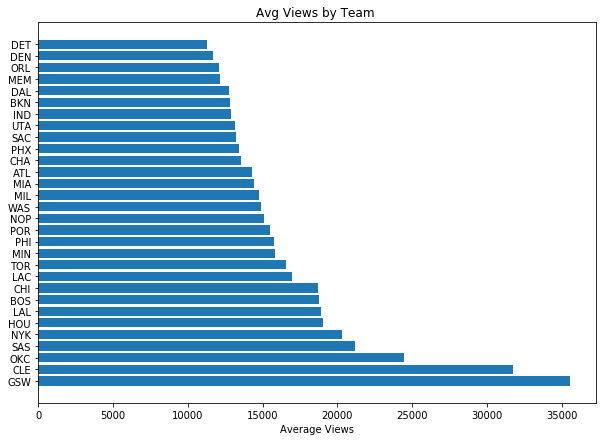

In [29]:
plt.rcParams['figure.figsize']=(10,7)
plt.title('Avg Views by Team ')
plt.xlabel('Average Views')
plt.barh(y=by_team17['Team'], width=by_team17['Avg_Viewers'])

We now examine the average viewership for each NBA team during the 2017 season. Some of the results are surprising. For example, the New York Knicks(NYK) and Los Angelse Lakers(LAL) both finished near the bottom in the standings but are in the top seven in average viewership. Similarly, the Utah Jazz(UTA) are in the top eight in win percentage, but in the bottom eight in average viewership.

In [31]:
standings17=pd.read_csv('data/NBA_Standings17.csv')

standings18=pd.read_csv('data/NBA_Standings18.csv')

In [32]:
by_team17=by_team17.merge(standings17, on='Team')

In [33]:
by_team17.sort_values(by=['Conference','Position'])

,Team,Avg_Viewers,Votes,Conference,Position,Percentage,Games_Behind,Pts_Scored,Pts_Allowed
7,BOS,18736.076923,2.054360e+06,East,1,0.646,NaN,108.0,105.4
1,CLE,31757.691176,5.811344e+06,East,2,0.622,2.0,110.3,107.2
10,TOR,16556.602740,2.410682e+06,East,3,0.622,2.0,106.9,102.6
15,WAS,14883.147059,1.536652e+06,East,4,0.598,4.0,109.2,107.4
18,ATL,14303.115942,1.458142e+06,East,5,0.524,10.0,103.2,104.0
16,MIL,14759.468750,3.069358e+06,East,6,0.512,11.0,103.6,103.8
22,IND,12860.686567,1.445615e+06,East,7,0.512,11.0,105.1,105.3
8,CHI,18704.805970,2.689271e+06,East,8,0.500,12.0,102.9,102.4
17,MIA,14445.376812,1.386242e+06,East,9,0.500,12.0,103.2,102.1
28,DET,11282.848485,1.399388e+06,East,10,0.451,16.0,101.3,102.5


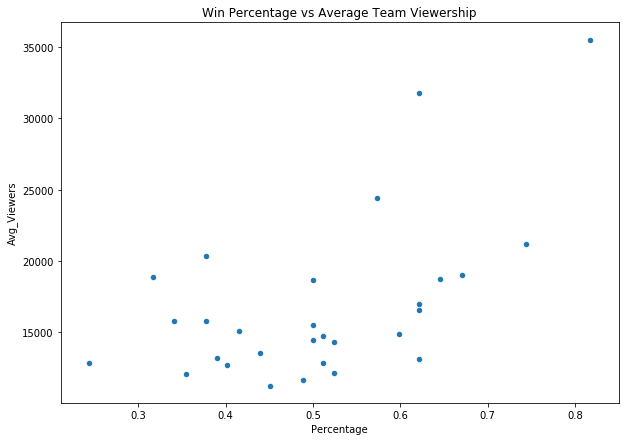

In [34]:
by_team17.plot.scatter(x='Percentage', y='Avg_Viewers', title='Win Percentage vs Average Team Viewership')

While there is some relationship between win percentage and the number of viewers, the trend seems to be fairly weak. There is a fair bit of variance in the viewership for a given win percentage.

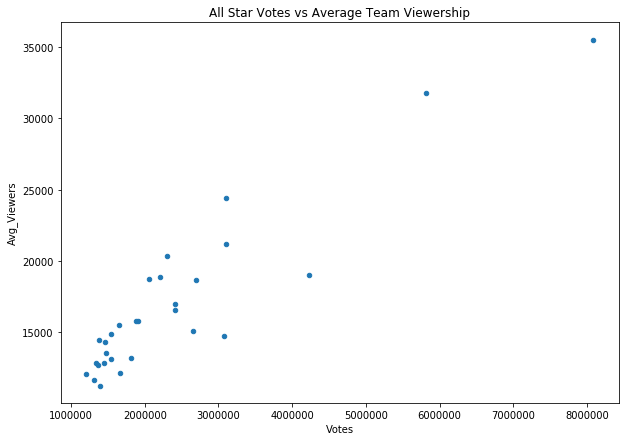

In [35]:
by_team17.plot.scatter(x='Votes', y='Avg_Viewers', title='All Star Votes vs Average Team Viewership')

In [36]:
by_team17.corr()['Avg_Viewers']

Avg_Viewers     1.000000
Votes           0.920166
Position       -0.506661
Percentage      0.561135
Games_Behind   -0.332019
Pts_Scored      0.598786
Pts_Allowed     0.042987
Name: Avg_Viewers, dtype: float64

Based on the scatterplot and the correlations, it's clear that the popularity of the players on the team is more important for viewership than the strength of the team. Another interesting observation based on the correlations is that the strength of a team's offense is correlated to its viewership while the strngth of its defense is not.